# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

In [3]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

     pcost       dcost       gap    pres   dres
 0:  1.5173e+00  3.7821e+01  1e+02  2e+00  3e+01
 1:  1.3803e+01  9.6371e+00  3e+01  5e-01  7e+00
 2:  2.1717e+01  1.7415e+01  3e+01  4e-01  6e+00
 3:  3.9769e+01  3.8469e+01  8e+00  7e-02  1e+00
 4:  4.3534e+01  4.3375e+01  5e-01  4e-03  6e-02
 5:  4.3726e+01  4.3699e+01  3e-02  8e-06  1e-04
 6:  4.3723e+01  4.3721e+01  1e-03  4e-07  5e-06
 7:  4.3723e+01  4.3723e+01  1e-05  4e-09  5e-08
Optimal solution found.
-5.425670975889613


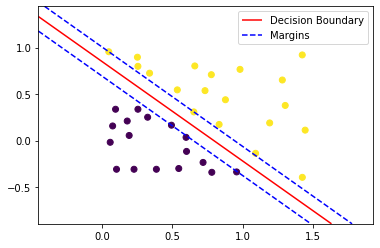

In [4]:
Q = matrix([[1.0,0.0,0.0],
            [0.0,1.0,0.0],
            [0.0,0.0,0.0]])
p = matrix([0.0,0.0,0.0])
ones = matrix(np.ones((x.shape[0])))
G = matrix(-np.concatenate((np.multiply(y,x[:,0]).reshape(-1,1),np.multiply(y,x[:,1]).reshape(-1,1),y.reshape(-1,1)),axis=1))

h = -ones
sol = solvers.qp(Q, p, G, h)

w1 = sol['x'][0]
w2 = sol['x'][1]
b = sol['x'][2]
print(sol['x'])
x_min = min(x[:, 0]) - 0.5
x_max = max(x[:, 0]) + 0.5
y_min = min(x[:, 1]) - 0.5
y_max = max(x[:, 1]) + 0.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)

Z = b + np.dot(d,np.array([w1,w2]))
Z = Z.reshape(xx.shape)
plt.scatter(x[:,0],x[:,1],c=y)
l = plt.contour(xx, yy, Z, levels=[0],colors='r')
m = plt.contour(xx, yy, Z, levels=[-1],linestyles='dashed',colors='b')
n = plt.contour(xx, yy, Z, levels=[1],linestyles='dashed',colors='b')
l.collections[0].set_label('Decision Boundary')
m.collections[0].set_label('Margins')

plt.legend(loc='upper right')
plt.show()




## b) and c) : Linearly Non-separable Dataset

     pcost       dcost       gap    pres   dres
 0:  1.2418e+00  3.9717e+01  6e+02  2e+00  7e+02
 1:  1.0376e+01 -1.5710e+01  3e+01  7e-02  2e+01
 2:  6.1726e+00  1.9674e-01  6e+00  1e-02  3e+00
 3:  2.6757e+00  1.9485e+00  7e-01  1e-03  3e-01
 4:  2.4029e+00  2.1622e+00  2e-01  3e-04  8e-02
 5:  2.3265e+00  2.2274e+00  1e-01  9e-05  3e-02
 6:  2.2888e+00  2.2613e+00  3e-02  2e-05  6e-03
 7:  2.2755e+00  2.2726e+00  3e-03  4e-16  2e-14
 8:  2.2740e+00  2.2739e+00  7e-05  4e-16  4e-14
 9:  2.2739e+00  2.2739e+00  7e-07  4e-16  3e-14
Optimal solution found.


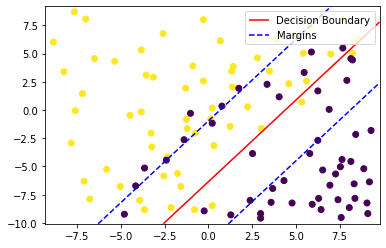

In [5]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]


C = 0.05
Q = matrix(np.zeros((x.shape[0]+3,x.shape[0]+3)))
Q[0,0] = 1
Q[1,1] = Q[0,0]
p = matrix(np.zeros([x.shape[0]+3,1]))
p[3:,:] = np.full([x.shape[0],1],C)

G1 = np.multiply(np.concatenate(([x,np.ones((x.shape[0],1))]),axis = 1),y.reshape(-1,1))
G2 = np.eye(x.shape[0])
G3 = np.zeros((x.shape[0],3))
G4 = np.eye(x.shape[0])
G = matrix(-np.concatenate((np.concatenate((G1,G2),axis=1),np.concatenate((G3,G4),axis=1)),axis=0))
h = matrix(-np.concatenate((np.ones((y.shape[0],1)),np.zeros((y.shape[0],1))),axis=0))

sol = solvers.qp(Q,p,G,h)

w1 = sol['x'][0]
w2 = sol['x'][1]
b = sol['x'][2]
zeta = np.array(sol['x'][3:])

x_min = min(x[:, 0]) - 0.5
x_max = max(x[:, 0]) + 0.5
y_min = min(x[:, 1]) - 0.5
y_max = max(x[:, 1]) + 0.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)

Z = b + np.dot(d,np.array([w1,w2]))
Z = Z.reshape(xx.shape)
plt.scatter(x[:,0],x[:,1],c=y)
l = plt.contour(xx, yy, Z, levels=[0],colors='r')
m = plt.contour(xx, yy, Z, levels=[-1],linestyles='dashed',colors='b')
n = plt.contour(xx, yy, Z, levels=[1],linestyles='dashed',colors='b')
l.collections[0].set_label('Decision Boundary')
m.collections[0].set_label('Margins')

plt.legend(loc='upper right')
plt.show()


     pcost       dcost       gap    pres   dres
 0:  2.0644e+00  5.0524e+01  7e+02  3e+00  6e+02
 1:  1.9690e+01 -2.3059e+01  5e+01  1e-01  3e+01
 2:  1.1116e+01  1.1465e+00  1e+01  2e-02  4e+00
 3:  5.1661e+00  3.9158e+00  1e+00  2e-03  5e-01
 4:  4.6987e+00  4.3010e+00  4e-01  5e-04  1e-01
 5:  4.5752e+00  4.4251e+00  2e-01  1e-04  3e-02
 6:  4.5227e+00  4.4685e+00  5e-02  3e-05  7e-03
 7:  4.5033e+00  4.4844e+00  2e-02  9e-06  2e-03
 8:  4.4945e+00  4.4920e+00  3e-03  7e-07  2e-04
 9:  4.4932e+00  4.4931e+00  3e-05  8e-09  2e-06
10:  4.4931e+00  4.4931e+00  3e-07  8e-11  2e-08
Optimal solution found.


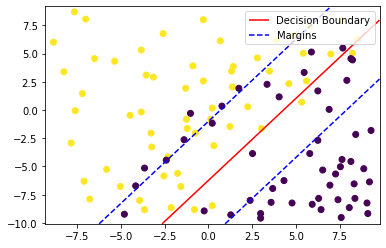

     pcost       dcost       gap    pres   dres
 0: -5.3430e+01  2.5866e+02  1e+03  4e+00  7e+01
 1:  1.3083e+02 -3.0700e+01  2e+02  5e-01  8e+00
 2:  5.6266e+01  3.4536e+01  2e+01  3e-02  5e-01
 3:  4.9781e+01  4.0113e+01  1e+01  1e-02  2e-01
 4:  4.6228e+01  4.2703e+01  4e+00  4e-03  6e-02
 5:  4.5200e+01  4.3715e+01  2e+00  1e-03  2e-02
 6:  4.4871e+01  4.3992e+01  9e-01  4e-04  6e-03
 7:  4.4528e+01  4.4306e+01  2e-01  8e-05  1e-03
 8:  4.4480e+01  4.4339e+01  1e-01  4e-05  7e-04
 9:  4.4429e+01  4.4388e+01  4e-02  3e-16  5e-14
10:  4.4408e+01  4.4407e+01  8e-04  4e-16  3e-13
11:  4.4407e+01  4.4407e+01  8e-06  4e-16  2e-13
Optimal solution found.


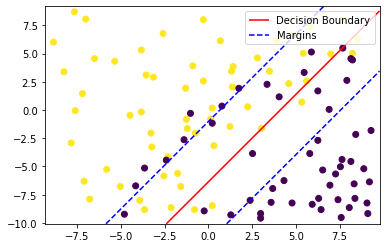

     pcost       dcost       gap    pres   dres
 0: -8.1935e+05  4.6922e+05  2e+06  2e+02  2e+01
 1:  1.4977e+05 -5.9743e+03  2e+05  4e+00  3e-01
 2:  8.0014e+03  2.6761e+03  6e+03  1e-01  8e-03
 3:  5.3250e+03  3.5779e+03  2e+03  3e-02  2e-03
 4:  5.1725e+03  3.8285e+03  1e+03  2e-02  1e-03
 5:  4.7825e+03  4.0969e+03  7e+02  8e-03  6e-04
 6:  4.6499e+03  4.2525e+03  4e+02  4e-03  3e-04
 7:  4.4915e+03  4.3960e+03  1e+02  1e-04  1e-05
 8:  4.4683e+03  4.4074e+03  6e+01  5e-05  4e-06
 9:  4.4356e+03  4.4342e+03  1e+00  8e-07  6e-08
10:  4.4348e+03  4.4348e+03  6e-02  3e-08  3e-09
11:  4.4348e+03  4.4348e+03  1e-03  6e-10  5e-11
Optimal solution found.


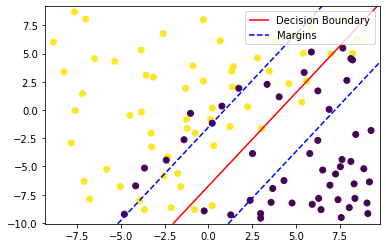

     pcost       dcost       gap    pres   dres
 0: -8.2223e+13  4.5071e+13  2e+14  2e+06  2e+01
 1:  1.4294e+13 -6.7821e+11  2e+13  3e+04  2e-01
 2:  2.5270e+11 -1.8156e+08  3e+11  4e+02  3e-03
 3:  2.5980e+09  2.6019e+07  3e+09  4e+00  3e-05
 4:  9.5287e+07  2.6381e+07  8e+07  1e-01  8e-07
 5:  5.5354e+07  3.4041e+07  2e+07  3e-02  2e-07
 6:  5.2265e+07  3.7746e+07  2e+07  2e-02  1e-07
 7:  4.8992e+07  4.0548e+07  9e+06  6e-03  5e-08
 8:  4.6404e+07  4.2701e+07  4e+06  2e-03  2e-08
 9:  4.4997e+07  4.3915e+07  1e+06  9e-05  7e-10
10:  4.4776e+07  4.4016e+07  8e+05  4e-05  3e-10
11:  4.4418e+07  4.4290e+07  1e+05  6e-06  5e-11
12:  4.4349e+07  4.4346e+07  3e+03  1e-07  1e-12
13:  4.4347e+07  4.4347e+07  2e+02  8e-09  4e-12
14:  4.4347e+07  4.4347e+07  2e+00  8e-11  4e-13
Optimal solution found.


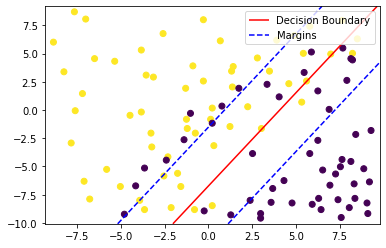

In [6]:
c = [0.1,1.0,100.0,1000000.0]
for C in c:
    Q = matrix(np.zeros((x.shape[0]+3,x.shape[0]+3)))
    Q[0,0] = 1
    Q[1,1] = Q[0,0]
    p = matrix(np.zeros([x.shape[0]+3,1]))
    p[3:,:] = np.full([x.shape[0],1],C)

    G1 = np.multiply(np.concatenate(([x,np.ones((x.shape[0],1))]),axis = 1),y.reshape(-1,1))
    G2 = np.eye(x.shape[0])
    G3 = np.zeros((x.shape[0],3))
    G4 = np.eye(x.shape[0])
    G = matrix(-np.concatenate((np.concatenate((G1,G2),axis=1),np.concatenate((G3,G4),axis=1)),axis=0))
    h = matrix(-np.concatenate((np.ones((y.shape[0],1)),np.zeros((y.shape[0],1))),axis=0))

    sol = solvers.qp(Q,p,G,h)

    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b = sol['x'][2]
    zeta = np.array(sol['x'][3:])

    x_min = min(x[:, 0]) - 0.5
    x_max = max(x[:, 0]) + 0.5
    y_min = min(x[:, 1]) - 0.5
    y_max = max(x[:, 1]) + 0.5
    step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)

    Z = b + np.dot(d,np.array([w1,w2]))
    Z = Z.reshape(xx.shape)
    plt.scatter(x[:,0],x[:,1],c=y)
    l = plt.contour(xx, yy, Z, levels=[0],colors='r')
    m = plt.contour(xx, yy, Z, levels=[-1],linestyles='dashed',colors='b')
    n = plt.contour(xx, yy, Z, levels=[1],linestyles='dashed',colors='b')
    l.collections[0].set_label('Decision Boundary')
    m.collections[0].set_label('Margins')

    plt.legend(loc='upper right')
    plt.show()

### Explain your observations here:

As the value of C increases, the penalty of a data point being located at the wrong side of the marings increase. Therefore, as the value of C increases, tthe margins get narrowed down and some of the points get classified correctly as compared to the small C values. 